In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

# Data preparing

In [179]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.015
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + torch.normal(mean=0.0, std=0.05, size=(len(X),)).unsqueeze(dim=1)

X[:10], y[:10]

(tensor([[0.0000],
         [0.0150],
         [0.0300],
         [0.0450],
         [0.0600],
         [0.0750],
         [0.0900],
         [0.1050],
         [0.1200],
         [0.1350]]),
 tensor([[0.3963],
         [0.3849],
         [0.3660],
         [0.2262],
         [0.3759],
         [0.2908],
         [0.3608],
         [0.2933],
         [0.3464],
         [0.4769]]))

In [180]:
X.shape, y.shape

(torch.Size([67, 1]), torch.Size([67, 1]))

In [181]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(53, 53, 14, 14)

In [182]:
train_split

53

In [183]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="orange", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

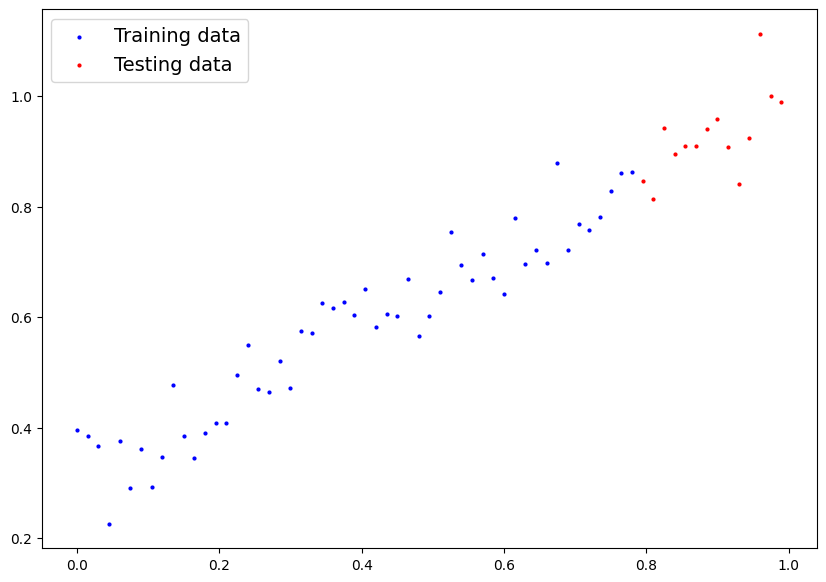

In [184]:
plot_predictions()

# Build model

In [185]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return (self.weights * x) + self.bias # <- this is the linear regression formula (y = m*x + b)

In [186]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [187]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [188]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)
    print(y_preds)

tensor([[0.3965],
        [0.4015],
        [0.4066],
        [0.4116],
        [0.4167],
        [0.4217],
        [0.4268],
        [0.4318],
        [0.4369],
        [0.4419],
        [0.4470],
        [0.4520],
        [0.4571],
        [0.4621]])


In [189]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 14
Number of predictions made: 14
Predicted values:
tensor([[0.3965],
        [0.4015],
        [0.4066],
        [0.4116],
        [0.4167],
        [0.4217],
        [0.4268],
        [0.4318],
        [0.4369],
        [0.4419],
        [0.4470],
        [0.4520],
        [0.4571],
        [0.4621]])


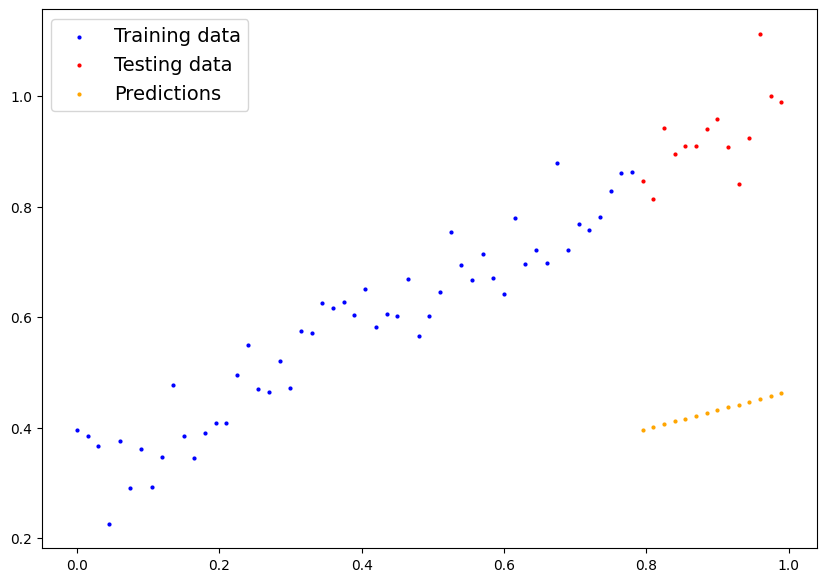

In [190]:
plot_predictions(predictions=y_preds)

In [191]:
y_test - y_preds

tensor([[0.4502],
        [0.4127],
        [0.5348],
        [0.4836],
        [0.4934],
        [0.4877],
        [0.5140],
        [0.5269],
        [0.4715],
        [0.3987],
        [0.4770],
        [0.6607],
        [0.5434],
        [0.5264]])

# Train the model

In [192]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

Epoch: 0 | MAE Train Loss: 0.3148631453514099 | MAE Test Loss: 0.485168993473053 
Epoch: 10 | MAE Train Loss: 0.20075838267803192 | MAE Test Loss: 0.3511466383934021 
Epoch: 20 | MAE Train Loss: 0.10741959512233734 | MAE Test Loss: 0.2302403450012207 
Epoch: 30 | MAE Train Loss: 0.0668688714504242 | MAE Test Loss: 0.15171204507350922 
Epoch: 40 | MAE Train Loss: 0.054999206215143204 | MAE Test Loss: 0.11120104044675827 
Epoch: 50 | MAE Train Loss: 0.053585395216941833 | MAE Test Loss: 0.10320360213518143 
Epoch: 60 | MAE Train Loss: 0.05263252928853035 | MAE Test Loss: 0.09795927256345749 
Epoch: 70 | MAE Train Loss: 0.05171436816453934 | MAE Test Loss: 0.09450752288103104 
Epoch: 80 | MAE Train Loss: 0.050807371735572815 | MAE Test Loss: 0.09157270938158035 
Epoch: 90 | MAE Train Loss: 0.049937013536691666 | MAE Test Loss: 0.08925814181566238 
Epoch: 100 | MAE Train Loss: 0.049115948379039764 | MAE Test Loss: 0.08587425202131271 
Epoch: 110 | MAE Train Loss: 0.04854205250740051 | MAE 

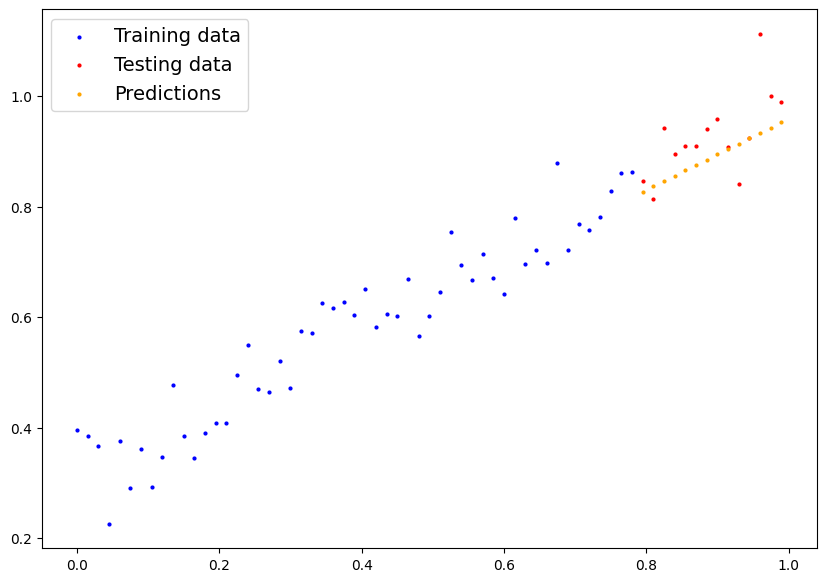

In [193]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

plot_predictions(predictions=test_pred)

In [194]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6448])), ('bias', tensor([0.3145]))])